In [1]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import seaborn as sns

In [2]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def download_file(file_id, file_name):
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(file_name)

In [3]:
# 'posting.csv' dataset: https://drive.google.com/file/d/150UcPZYXz_L5J3S3nOHaMG3bLdL-3iAs/view?usp=sharing
download_file('150UcPZYXz_L5J3S3nOHaMG3bLdL-3iAs', 'postings.csv')

# company
download_file('1Ime723DZCukysh2UGlLN9SXmAvtXXuBK', 'companies.csv')
download_file('1mYd_uVIjtklSyLecpkqa-OTxFhEUAc2A', 'company_industries.csv')
download_file('1bd9qlhly8rVgmLhvEfqg_9fKyzufujQu', 'company_specialities.csv')
download_file('1_2RKNP3APFL_kVUw1xneNtAP78MOLgQP', 'employee_counts.csv')

# jobs
download_file('1gVkQHzzNOivqU3DCyQ_hbJ3dhAZUNZ28', 'benefits.csv')
download_file('1qOeJg-E1CBTbd5ZjLvF5fitlgNYm_Cid', 'job_industries.csv')
download_file('1c8NCg4SmnDFZBaMNNmZig9b6hasA55vr', 'job_skills.csv')
download_file('1AmFFtziv4rUgA2CJmp9cHZPUlDLp7lmJ', 'salaries.csv')

# mappings
download_file('1K5NuH_6l42qJie3jcfCfSEYCn2irilyh', 'industries.csv')
download_file('1koWdPW_f10-fpepgrhlGj3uaikG8pELI', 'skills.csv')

In [4]:
postings = pd.read_csv('postings.csv')

companies = pd.read_csv('companies.csv')
company_industries = pd.read_csv('company_industries.csv')
company_specialities = pd.read_csv('company_specialities.csv')
employee_counts = pd.read_csv('employee_counts.csv')

benefits = pd.read_csv('benefits.csv')
job_industries = pd.read_csv('job_industries.csv')
job_skills = pd.read_csv('job_skills.csv')
salaries = pd.read_csv('salaries.csv')

industries = pd.read_csv('industries.csv')
skills = pd.read_csv('skills.csv')

In [5]:
companies.head(1)

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm


In [6]:
company_industries.head(1)

,company_id,industry
0,391906,Book and Periodical Publishing


In [7]:
company_specialities.head(1)

,company_id,speciality
0,22292832,window replacement


In [8]:
employee_counts.head(1)

,company_id,employee_count,follower_count,time_recorded
0,391906,186,32508,1712346173


In [9]:
benefits.head(1)

,job_id,inferred,type
0,3887473071,0,Medical insurance


In [10]:
job_industries.head(1)

,job_id,industry_id
0,3884428798,82


In [11]:
job_skills.head(1)

,job_id,skill_abr
0,3884428798,MRKT


In [12]:
salaries.head(1)

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,1,3884428798,NaN,20.0,NaN,HOURLY,USD,BASE_SALARY


In [13]:
postings.head(1)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0


In [14]:
# percentage of missing values for each column
missing_percentage = postings.isnull().mean() * 100
missing_percentage

,0
job_id,0.000000
company_name,1.387981
title,0.000000
description,0.005652
max_salary,75.944093
pay_period,70.873402
location,0.000000
company_id,1.386366
views,1.363757
med_salary,94.929309


# Hypothesis 1: Job level

**Hypothesis:** Senior roles are less likely to offer remote work options compared to entry- and mid-level positions.

In [17]:
postings['remote_allowed'].unique()

array([nan,  1.])

In [16]:
postings[postings['remote_allowed'] == 1]['work_type'].unique()

array(['CONTRACT', 'FULL_TIME', 'PART_TIME', 'VOLUNTEER', 'INTERNSHIP',
       'OTHER', 'TEMPORARY'], dtype=object)

In [18]:
postings['formatted_experience_level'].unique()

array([nan, 'Entry level', 'Mid-Senior level', 'Associate', 'Director',
       'Internship', 'Executive'], dtype=object)

In [19]:
# fill in some of the nans of 'formatted_experience_level' with values from other column 'work_type'
postings['formatted_experience_level'] = np.where(
    (postings['formatted_experience_level'].isnull()) & (postings['work_type'].isin(['VOLUNTEER', 'INTERNSHIP'])),
    'Entry level', postings['formatted_experience_level'])

filtered_postings = postings.dropna(subset=['formatted_experience_level', 'remote_allowed'])

In [20]:
# categorize experience levels into broader groups
def categorize_experience(level):
    if level in ['Entry level', 'Associate', 'Internship']:
        return 'Entry-Level'
    elif level == 'Mid-Senior level':
        return 'Mid-Level'
    elif level in ['Director', 'Executive']:
        return 'Senior-Level'
    else:
        return 'Other'

filtered_postings['experience_category'] = filtered_postings['formatted_experience_level'].apply(categorize_experience)

<ipython-input-20-06dfed732f47>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_postings['experience_category'] = filtered_postings['formatted_experience_level'].apply(categorize_experience)


In [21]:
# calculate the percentage proportion of remote jobs by experience category
remote_jobs = filtered_postings[filtered_postings['remote_allowed'] == 1]

remote_count = remote_jobs.groupby('experience_category')['remote_allowed'].count()
total_remote_jobs = remote_jobs['remote_allowed'].count()
remote_summary = (remote_count / total_remote_jobs * 100).reset_index()
remote_summary.columns = ['Experience Level', 'Percentage Remote Allowed']
remote_summary

,Experience Level,Percentage Remote Allowed
0,Entry-Level,32.095194
1,Mid-Level,59.514699
2,Senior-Level,8.390107


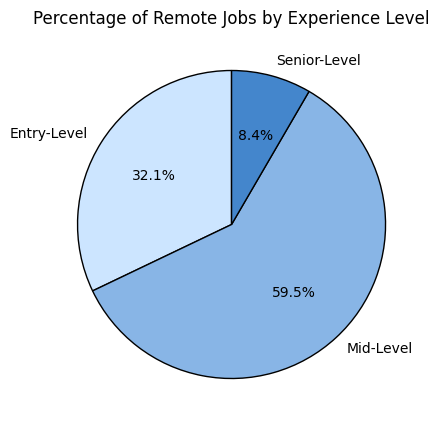

In [22]:
# light-to-dark color gradient
colors = list(mcolors.LinearSegmentedColormap.from_list("light_to_dark", ["#cce5ff", "#0056b3"])([i/3 for i in range(3)]))

plt.figure(figsize=(5, 5))
plt.pie(
    remote_summary['Percentage Remote Allowed'],
    labels=remote_summary['Experience Level'],
    autopct='%1.1f%%',  # Format percentages with 1 decimal place
    startangle=90,  # Rotate the pie chart for better orientation
    colors=colors,  # Light-to-dark colors
    wedgeprops={'edgecolor': 'black'}  # Add border to the slices
)
plt.title('Percentage of Remote Jobs by Experience Level')
plt.show()


In [23]:
# Calculate proportions of remote work by experience category
remote_summary = filtered_postings.groupby('experience_category')['remote_allowed'].count().reset_index()
remote_summary.columns = ['Experience Level', 'Proportion Remote Allowed']

print(remote_summary)

  Experience Level  Proportion Remote Allowed
0      Entry-Level                       3439
1        Mid-Level                       6377
2     Senior-Level                        899


# Hypothesis 2: Demand of SQL skills by industry
Hypothesis: SQL is more frequently required in data-centric industries such as finance, healthcare, and e-commerce compared to other sectors.

In [24]:
postings.head(1)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0


In [26]:
# Check if 'sql' is in either 'skills_desc' or 'description' (case-insensitive)
postings['requires_sql'] = (
    postings['skills_desc'].str.contains(r'\bsql\b', case=False, na=False) |
    postings['description'].str.contains(r'\bsql\b', case=False, na=False)
)

postings['requires_sql'] = postings['requires_sql'].astype(int)
postings[['skills_desc', 'description', 'requires_sql']].head()

,skills_desc,description,requires_sql
0,Requirements: \n\nWe are seeking a College or ...,Job descriptionA leading real estate firm in N...,0
1,NaN,"At Aspen Therapy and Wellness , we are committ...",0
2,We are currently accepting resumes for FOH - A...,The National Exemplar is accepting application...,0
3,This position requires a baseline understandin...,Senior Associate Attorney - Elder Law / Trusts...,0
4,NaN,Looking for HVAC service tech with experience ...,0


In [27]:
postings['requires_sql'].value_counts()

,count
requires_sql,
0,118658
1,5191


In [30]:
merged_postings = pd.merge(postings, company_industries, on='company_id', how='left')
comp_merged = pd.merge(merged_postings, companies[['company_id', 'company_size']], on='company_id', how='left')

# include only rows where 'requires_sql' is 1
sql_postings = comp_merged[comp_merged['requires_sql'] == 1]
sql_postings.head(1)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,requires_sql,industry,company_size
69,2147609785,The Job Network,FP&A Analyst,Integrity is one of the nation’s leading indep...,NaN,NaN,"Dallas, TX",167757.0,2.0,NaN,...,0,FULL_TIME,NaN,NaN,NaN,75201.0,48113.0,1,Staffing and Recruiting,2.0


In [31]:
# Group by industry and company size to calculate posting counts
industry_summary = sql_postings.groupby(['industry', 'company_size']).agg(
                   company_count=('requires_sql', 'count')).reset_index()

In [54]:
# top 10 industries based on total company posting counts
top_industries = (
    sql_postings.groupby('industry')['requires_sql'].count()
    .sort_values(ascending=False)
    .head(10)
    .index
)
top_industry_data = industry_summary[industry_summary['industry'].isin(top_industries)]

list(top_industries)

['IT Services and IT Consulting',
 'Software Development',
 'Staffing and Recruiting',
 'Financial Services',
 'Hospitals and Health Care',
 'Insurance',
 'Business Consulting and Services',
 'Advertising Services',
 'Retail',
 'Telecommunications']

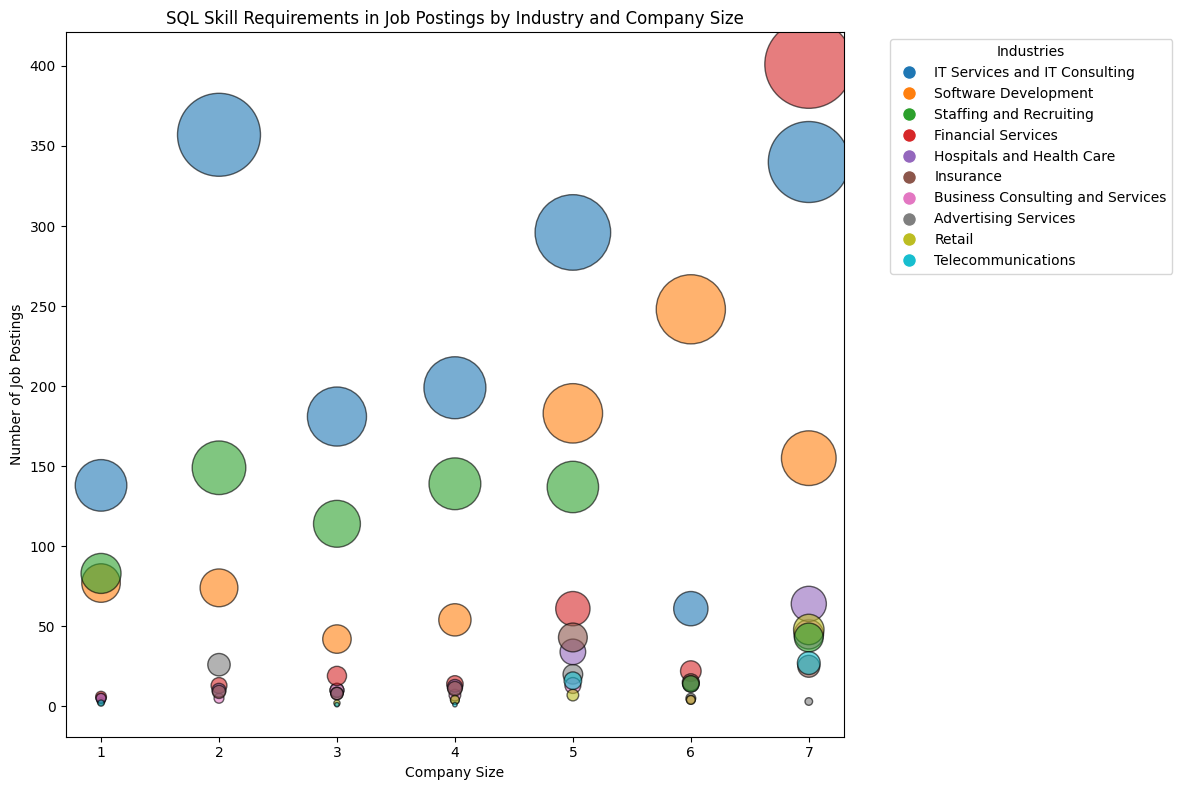

In [55]:
# Create the bubble chart

# palette for industries
palette = sns.color_palette('tab10', len(top_industries))
industry_colors = dict(zip(top_industries, palette))

plt.figure(figsize=(12, 8))
for industry, group in top_industry_data.groupby('industry'):
    plt.scatter(
        group['company_size'],
        group['company_count'],
        s=group['company_count'] * 10,  # Scale bubble size
        label=industry,
        alpha=0.6,
        color=industry_colors[industry],
        edgecolors='black'
    )
plt.xlabel('Company Size')
plt.ylabel('Number of Job Postings')
plt.title('SQL Skill Requirements in Job Postings by Industry and Company Size')

handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in palette]
plt.legend(handles=handles, title='Industries', labels=list(top_industries), bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()